In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Các thư viện Scikit-learn (sklearn) cho HỒI QUY
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # Mô hình cơ sở
from sklearn.ensemble import RandomForestRegressor # Mô hình để tinh chỉnh
from sklearn.metrics import mean_squared_error, r2_score

# Tắt cảnh báo
import warnings
warnings.filterwarnings('ignore')

# --- Tải Dữ liệu ---
file_path = 'energy_efficiency_data.csv'
df = pd.read_csv(file_path)

print("Tải dữ liệu thành công!")
print(df.head())

Tải dữ liệu thành công!
     X1     X2     X3      X4   X5  X6   X7  X8     Y1
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84


--- Yêu cầu 1: Biểu diễn dữ liệu ---


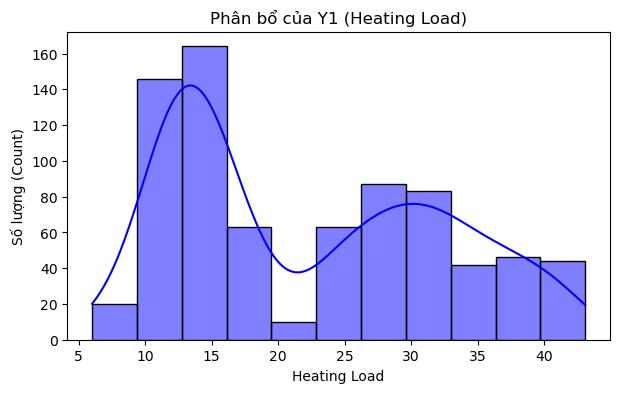

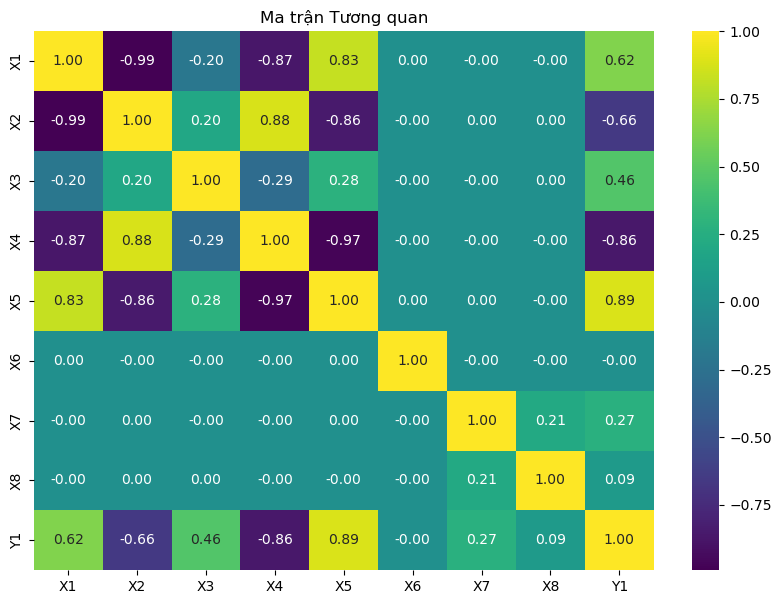

In [3]:
print("--- Yêu cầu 1: Biểu diễn dữ liệu ---")

# 1. Tách X (đặc trưng) và y (mục tiêu)
# X là 8 cột đầu tiên, y là cột 'Y1' (cột thứ 9, index là 8)
X = df.iloc[:, 0:8] 
y = df['Y1']

# 2. Vẽ biểu đồ phân bổ (Histogram) của cột mục tiêu 'y' (Y1)
plt.figure(figsize=(7, 4))
sns.histplot(y, kde=True, color='blue')
plt.title('Phân bổ của Y1 (Heating Load)')
plt.xlabel('Heating Load')
plt.ylabel('Số lượng (Count)')
plt.show() # [cite: 992-1000]

# 3. Vẽ biểu đồ tương quan (Heatmap)
# Xem các đặc trưng (X) liên quan đến nhau và đến 'Y1' như thế nào
plt.figure(figsize=(10, 7))
# Chúng ta .corr() trên toàn bộ df để xem Y1 và Y2 liên quan thế nào
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Ma trận Tương quan')
plt.show() # [cite: 992-1000]

--- Yêu cầu 2 & 3: Huấn luyện và Đánh giá (Mô hình Linear Regression) ---
Đã chuẩn hóa dữ liệu.
Đã huấn luyện xong mô hình LinearRegression.

--- Đánh giá Linear Regression ---
Mean Squared Error (MSE): 9.1532
Root Mean Squared Error (RMSE): 3.0254
R-squared (R2 Score): 0.9122


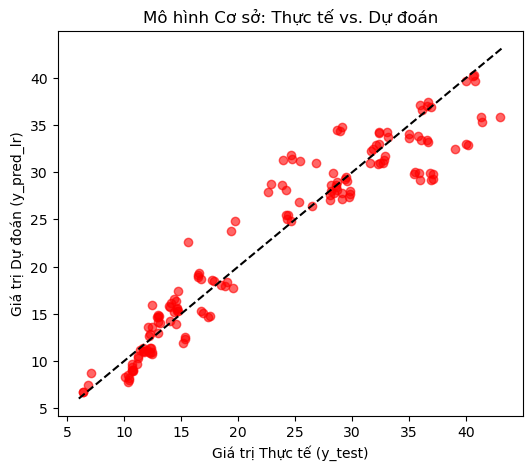

In [5]:
print("--- Yêu cầu 2 & 3: Huấn luyện và Đánh giá (Mô hình Linear Regression) ---")

# --- Chia dữ liệu ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Chuẩn hóa dữ liệu ---
# Mặc dù Linear Regression không bắt buộc, nhưng đây là thói quen tốt
# và bắt buộc cho các mô hình như SVR/KNN.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Đã chuẩn hóa dữ liệu.")

# --- Yêu cầu 2: Huấn luyện mô hình ---
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train) # [cite: 969]
print("Đã huấn luyện xong mô hình LinearRegression.")

# --- Yêu cầu 3: Đánh giá mô hình ---
y_pred_lr = model_lr.predict(X_test_scaled) # [cite: 970]

# 3.1. Dùng Mean Squared Error (MSE) [cite: 1039-1043]
mse_lr = mean_squared_error(y_test, y_pred_lr)
# RMSE (Root Mean Squared Error) là căn bậc hai của MSE.
# Nó dễ hiểu hơn vì nó cùng đơn vị với 'y' (Heating Load).
rmse_lr = np.sqrt(mse_lr) 
print(f"\n--- Đánh giá Linear Regression ---")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")

# 3.2. Dùng R-squared (R2 Score)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R-squared (R2 Score): {r2_lr:.4f}")

# 3.3. Vẽ biểu đồ dự đoán vs. thực tế [cite: 992-1000]
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--') # Đường tham chiếu y=x
plt.title('Mô hình Cơ sở: Thực tế vs. Dự đoán')
plt.xlabel('Giá trị Thực tế (y_test)')
plt.ylabel('Giá trị Dự đoán (y_pred_lr)')
plt.show()

--- Yêu cầu 4: Tinh chỉnh Mô hình (Grid Search với RandomForest) ---
(Mục tiêu: RMSE <= 1.5 | RMSE cơ sở: 3.0254)
Bắt đầu Grid Search cho RandomForest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Grid Search hoàn tất!
Các tham số tốt nhất tìm được: {'max_depth': None, 'n_estimators': 150}

--- Đánh giá Mô hình RandomForest Tốt nhất ---
Mean Squared Error (MSE): 0.2408
Root Mean Squared Error (RMSE): 0.4907
R-squared (R2 Score): 0.9977

CHÚC MỪNG! Đã đạt được giá trị kỳ vọng (RMSE <= 1.5)


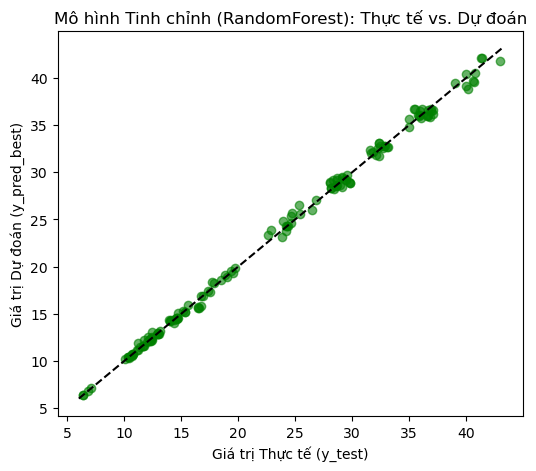

In [7]:
print("--- Yêu cầu 4: Tinh chỉnh Mô hình (Grid Search với RandomForest) ---")
print(f"(Mục tiêu: RMSE <= 1.5 | RMSE cơ sở: {rmse_lr:.4f})")

# 1. Định nghĩa không gian tham số (param_grid)
# Chúng ta sẽ thử số lượng "cây" (n_estimators) và độ sâu (max_depth)
param_grid = {
    'n_estimators': [50, 100, 150], # Số lượng cây
    'max_depth': [None, 10, 20]     # Độ sâu tối đa của mỗi cây
}

# 2. Khởi tạo GridSearchCV
# Chúng ta tối ưu 'neg_mean_squared_error' (MSE âm)
# cv=5 (5-fold cross-validation)
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           verbose=1)

print("Bắt đầu Grid Search cho RandomForest...")
# Chạy Grid Search trên TẬP HUẤN LUYỆN
# Lưu ý: RandomForest không bắt buộc dùng dữ liệu đã chuẩn hóa (scaled)
# nhưng dùng cũng không sao. Chúng ta sẽ dùng X_train gốc.
grid_search.fit(X_train, y_train) # Dùng X_train (gốc)

# 3. In ra kết quả tốt nhất
print("\nGrid Search hoàn tất!")
print(f"Các tham số tốt nhất tìm được: {grid_search.best_params_}")

# 4. Lấy mô hình tốt nhất
best_model_rf = grid_search.best_estimator_

# --- Đánh giá lại mô hình TỐT NHẤT trên tập TEST ---
y_pred_best = best_model_rf.predict(X_test) # Dùng X_test (gốc)

print("\n--- Đánh giá Mô hình RandomForest Tốt nhất ---")
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best:.4f}") # <-- So sánh với mục tiêu
print(f"R-squared (R2 Score): {r2_best:.4f}")

if rmse_best <= 1.5:
    print("\nCHÚC MỪNG! Đã đạt được giá trị kỳ vọng (RMSE <= 1.5)")
else:
    print("\nCHƯA ĐẠT MỤC TIÊU. Cần tinh chỉnh thêm.")
    
# Vẽ biểu đồ kết quả
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_best, alpha=0.6, c='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Mô hình Tinh chỉnh (RandomForest): Thực tế vs. Dự đoán')
plt.xlabel('Giá trị Thực tế (y_test)')
plt.ylabel('Giá trị Dự đoán (y_pred_best)')
plt.show()